# Evaluation

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
import seaborn as sns
from matplotlib.lines import Line2D


# Load the CSV file
file_path = "evaluation.csv"
df = pd.read_csv(file_path)

# Clean up
clean_df = df.iloc[2:].copy() # The first two rows are removed because they are metadata
print(clean_df.columns)
pd.set_option('display.max_columns', None)
clean_df

Index(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage', 'Q2', 'Q3', 'Q6_1', 'Q6_2',
       'Q6_3', 'Q6_4', 'Q6_5', 'Q6_6', 'Q6_7', 'Q6_8', 'Q6_9', 'Q6_10',
       'Q6_11', 'Q8', 'Q23_1', 'Q23_2', 'Q23_3', 'Q23_4', 'Q23_5', 'Q23_6',
       'Q23_7', 'Q23_8', 'Q23_9', 'Q23_10', 'Q23_11', 'Q35', 'Q24_1', 'Q24_2',
       'Q24_3', 'Q24_4', 'Q24_5', 'Q24_6', 'Q24_7', 'Q24_8', 'Q24_9', 'Q24_10',
       'Q24_11', 'Q38', 'Q25_1', 'Q25_2', 'Q25_3', 'Q25_4', 'Q25_5', 'Q25_6',
       'Q25_7', 'Q25_8', 'Q25_9', 'Q25_10', 'Q25_11', 'Q41', 'Q26_1', 'Q26_2',
       'Q26_3', 'Q26_4', 'Q26_5', 'Q26_6', 'Q26_7', 'Q26_8', 'Q26_9', 'Q26_10',
       'Q26_11', 'Q44'],
      dtype='object')


,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,RecipientFirstName,RecipientEmail,ExternalReference,LocationLatitude,LocationLongitude,DistributionChannel,UserLanguage,Q2,Q3,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,Q6_7,Q6_8,Q6_9,Q6_10,Q6_11,Q8,Q23_1,Q23_2,Q23_3,Q23_4,Q23_5,Q23_6,Q23_7,Q23_8,Q23_9,Q23_10,Q23_11,Q35,Q24_1,Q24_2,Q24_3,Q24_4,Q24_5,Q24_6,Q24_7,Q24_8,Q24_9,Q24_10,Q24_11,Q38,Q25_1,Q25_2,Q25_3,Q25_4,Q25_5,Q25_6,Q25_7,Q25_8,Q25_9,Q25_10,Q25_11,Q41,Q26_1,Q26_2,Q26_3,Q26_4,Q26_5,Q26_6,Q26_7,Q26_8,Q26_9,Q26_10,Q26_11,Q44
2,2025-05-31 14:01:54,2025-05-31 14:25:31,0,194.53.88.20,100,1417,1,2025-05-31 14:25:32,R_2PnUXWIS2uPVKIj,NaN,NaN,NaN,NaN,51.542,5.0878,anonymous,NL,3,Intensive care,3,2,4,1,2,2,1,4,3,3,4,De uitleg is niet actiegericht en ook niet pas...,4,4,5,1,3,1,3,4,4,4,2,"Contradictio: je kan niet zeggen ""advies: geen...",4,3,4,2,3,1,2,4,1,2,4,"Pas op dat je met ""wat als"" scenario's geen ca...",4,3,2,2,1,2,3,4,3,3,1,Dit vind ik een heel interessante en ben ik ze...,2,2,1,1,1,1,1,3,1,1,2,Zie mijn antwoord 2 vragen terug: je impliceer...
3,2025-06-16 03:27:08,2025-06-16 04:01:35,0,80.113.200.135,100,2066,1,2025-06-16 04:01:36,R_2MMrKZKDJmtd1gS,NaN,NaN,NaN,NaN,51.436,5.4966,anonymous,NL,3,NaN,5,2,2,3,2,4,3,1,4,3,1,Dit is voor de dagelijkse praktijk niet toegan...,4,3,4,4,4,4,3,4,3,4,4,het advies met de zekerheid maken het meer act...,4,4,4,4,4,4,4,4,4,2,4,"Erg leuke extra optie, maar alleen nuttig voor...",4,4,4,4,4,4,4,4,4,2,4,"Zelfde als net, alles is optioneel en leuke op...",4,4,4,4,4,4,4,4,4,2,4,Allemaal opties om vertrouwen te winnen in eer...
4,2025-06-25 10:18:58,2025-06-25 11:09:22,0,62.45.98.106,100,3024,1,2025-06-25 11:09:23,R_80Spei4za2MBZpy,NaN,NaN,NaN,NaN,51.7698,5.5709,anonymous,NL,3,Intensivist,4,3,2,4,4,4,3,4,4,4,1,Uitleg is prima om achtergrond van het model m...,4,4,1,4,3,4,3,4,4,4,1,Zelfde opmerking als vorige vraag,4,4,1,4,3,4,3,4,4,4,1,Zelfde commentaar als eerder. Verder suggereer...,4,4,1,4,3,4,3,4,4,4,1,Zelfde commentaar als vorige vraag.,4,4,1,4,3,4,3,4,4,4,1,Zelfde commentaar als vorige twee vragen
5,2025-06-27 07:14:38,2025-06-27 08:08:32,0,194.104.125.22,100,3233,1,2025-06-27 08:08:33,R_8MfgLKSEWa0X3rN,NaN,NaN,NaN,NaN,51.5883,4.8042,anonymous,NL,3,Intensive Care,4,4,4,4,4,2,3,2,2,4,2,Grafisch is het duidelijk weergegeven.\nAlles ...,4,4,4,4,4,4,3,4,4,4,4,Nu is wel duidelijk waarop het systeem is geba...,4,4,4,4,3,4,3,4,4,4,3,Ik zie hier alleen toegeve4ogde waarde in een ...,4,4,4,4,4,3,3,4,4,4,2,Oneens. Met een model met dergelijke brede bet...,4,4,4,4,3,4,3,4,4,4,2,Op zich is de uitleg nuttig en helder. Een der...
6,2025-06-27 15:33:54,2025-06-27 16:18:43,0,91.214.67.97,100,2688,1,2025-06-27 16:18:43,R_22KJ6Gu50fBwIdL,NaN,NaN,NaN,NaN,52.3759,4.8975,anonymous,NL,3,Intensivist,4,4,4,3,3,3,4,4,3,3,2,NaN,2,2,2,2,3,3,3,3,3,3,2,NaN,3,2,3,3,2,3,3,4,3,3,3,NaN,2,2,2,2,2,3,3,3,3,3,2,NaN,2,2,2,2,2,3,3,3,3,3,2,NaN
7,2025-07-01 16:11:42,2025-07-01 16:19:31,0,212.178.79.162,100,469,1,2025-07-01 16:19:32,R_82InTyemkQc9625,NaN,NaN,NaN,NaN,52.3564,6.6698,anonymous,NL,3,Internist-intensivist\n,5,5,4,4,4,4,4,4,4,4,4,NaN,5,5,5,5,5,5,5,5,5,5,5,NaN,5,5,5,5,4,5,5,5,5,5,5,NaN,5,5,4,4,4,5,5,5,5,5,5,NaN,5,5,5,5,5,5,5,5,5,5,5,NaN


In [2]:
custom_color = "#006ae3"
font = "Times New Roman"
titelsize = 14
labelsize = 12
# Set font to Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'

# Change column names

In [3]:
# Define mapping for explanation types
explanation_type_map = {
    "Q6": "How",
    "Q23": "Why",
    "Q24": "Whatif",
    "Q25": "Howtostillbethis",
    "Q26": "Howtobethat"
}

# Define mapping for quality properties
quality_map = {
    "_1": "Understanding",
    "_2": "Ease_of_understanding",
    "_3": "Ease_of_use",
    "_4": "Satisfaction",
    "_5": "Usefulness",
    "_6": "Trust",
    "_7": "Typicality",
    "_8": "Sufficiency",
    "_9": "Correctness",
    "_10": "Compactness",
    "_11": "Actionability"
}

# Explicit renaming for open-ended columns
open_ended_map = {
    "Q8": "How_open",
    "Q35": "Whynot_open",
    "Q38": "Whatif_open",
    "Q41": "Howtostillbethis_open",
    "Q44": "Howtobethat_open"
}

# Function to rename columns
def rename_column(col):
    if col in open_ended_map:
        return open_ended_map[col]
    for prefix, expl_type in explanation_type_map.items():
        if col.startswith(prefix + "_"):
            suffix = col[len(prefix):]  # e.g., "_1"
            if suffix in quality_map:
                return f"{expl_type}_{quality_map[suffix]}"
    return col  # keep column unchanged if no match

# Apply renaming
clean_df.columns = [rename_column(col) for col in clean_df.columns]


In [4]:
clean_df

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,RecipientFirstName,RecipientEmail,ExternalReference,LocationLatitude,LocationLongitude,DistributionChannel,UserLanguage,Q2,Q3,How_Understanding,How_Ease_of_understanding,How_Ease_of_use,How_Satisfaction,How_Usefulness,How_Trust,How_Typicality,How_Sufficiency,How_Correctness,How_Compactness,How_Actionability,How_open,Why_Understanding,Why_Ease_of_understanding,Why_Ease_of_use,Why_Satisfaction,Why_Usefulness,Why_Trust,Why_Typicality,Why_Sufficiency,Why_Correctness,Why_Compactness,Why_Actionability,Whynot_open,Whatif_Understanding,Whatif_Ease_of_understanding,Whatif_Ease_of_use,Whatif_Satisfaction,Whatif_Usefulness,Whatif_Trust,Whatif_Typicality,Whatif_Sufficiency,Whatif_Correctness,Whatif_Compactness,Whatif_Actionability,Whatif_open,Howtostillbethis_Understanding,Howtostillbethis_Ease_of_understanding,Howtostillbethis_Ease_of_use,Howtostillbethis_Satisfaction,Howtostillbethis_Usefulness,Howtostillbethis_Trust,Howtostillbethis_Typicality,Howtostillbethis_Sufficiency,Howtostillbethis_Correctness,Howtostillbethis_Compactness,Howtostillbethis_Actionability,Howtostillbethis_open,Howtobethat_Understanding,Howtobethat_Ease_of_understanding,Howtobethat_Ease_of_use,Howtobethat_Satisfaction,Howtobethat_Usefulness,Howtobethat_Trust,Howtobethat_Typicality,Howtobethat_Sufficiency,Howtobethat_Correctness,Howtobethat_Compactness,Howtobethat_Actionability,Howtobethat_open
2,2025-05-31 14:01:54,2025-05-31 14:25:31,0,194.53.88.20,100,1417,1,2025-05-31 14:25:32,R_2PnUXWIS2uPVKIj,NaN,NaN,NaN,NaN,51.542,5.0878,anonymous,NL,3,Intensive care,3,2,4,1,2,2,1,4,3,3,4,De uitleg is niet actiegericht en ook niet pas...,4,4,5,1,3,1,3,4,4,4,2,"Contradictio: je kan niet zeggen ""advies: geen...",4,3,4,2,3,1,2,4,1,2,4,"Pas op dat je met ""wat als"" scenario's geen ca...",4,3,2,2,1,2,3,4,3,3,1,Dit vind ik een heel interessante en ben ik ze...,2,2,1,1,1,1,1,3,1,1,2,Zie mijn antwoord 2 vragen terug: je impliceer...
3,2025-06-16 03:27:08,2025-06-16 04:01:35,0,80.113.200.135,100,2066,1,2025-06-16 04:01:36,R_2MMrKZKDJmtd1gS,NaN,NaN,NaN,NaN,51.436,5.4966,anonymous,NL,3,NaN,5,2,2,3,2,4,3,1,4,3,1,Dit is voor de dagelijkse praktijk niet toegan...,4,3,4,4,4,4,3,4,3,4,4,het advies met de zekerheid maken het meer act...,4,4,4,4,4,4,4,4,4,2,4,"Erg leuke extra optie, maar alleen nuttig voor...",4,4,4,4,4,4,4,4,4,2,4,"Zelfde als net, alles is optioneel en leuke op...",4,4,4,4,4,4,4,4,4,2,4,Allemaal opties om vertrouwen te winnen in eer...
4,2025-06-25 10:18:58,2025-06-25 11:09:22,0,62.45.98.106,100,3024,1,2025-06-25 11:09:23,R_80Spei4za2MBZpy,NaN,NaN,NaN,NaN,51.7698,5.5709,anonymous,NL,3,Intensivist,4,3,2,4,4,4,3,4,4,4,1,Uitleg is prima om achtergrond van het model m...,4,4,1,4,3,4,3,4,4,4,1,Zelfde opmerking als vorige vraag,4,4,1,4,3,4,3,4,4,4,1,Zelfde commentaar als eerder. Verder suggereer...,4,4,1,4,3,4,3,4,4,4,1,Zelfde commentaar als vorige vraag.,4,4,1,4,3,4,3,4,4,4,1,Zelfde commentaar als vorige twee vragen
5,2025-06-27 07:14:38,2025-06-27 08:08:32,0,194.104.125.22,100,3233,1,2025-06-27 08:08:33,R_8MfgLKSEWa0X3rN,NaN,NaN,NaN,NaN,51.5883,4.8042,anonymous,NL,3,Intensive Care,4,4,4,4,4,2,3,2,2,4,2,Grafisch is het duidelijk weergegeven.\nAlles ...,4,4,4,4,4,4,3,4,4,4,4,Nu is wel duidelijk waarop het systeem is geba...,4,4,4,4,3,4,3,4,4,4,3,Ik zie hier alleen toegeve4ogde waarde in een ...,4,4,4,4,4,3,3,4,4,4,2,Oneens. Met een model met dergelijke brede bet...,4,4,4,4,3,4,3,4,4,4,2,Op zich is de uitleg nuttig en helder. Een der...
6,2025-06-27 15:33:54,2025-06-27 16:18:43,0,91.214.67.97,100,2688,1,2025-06-27 16:18:43,R_22KJ6Gu50fBwIdL,NaN,NaN,NaN,NaN,52.3759,4.8975,anonymous,NL,3,Intensivist,4,4,4,3,3,3,4,4,3,3,2,NaN,2,2,2,2,3,3,3,3,3,3,2,NaN,3,2,3,3,2,3,3,4,3,3,3,NaN,2,2,2,2,2,3,3,3,3,3,2,NaN,2,2,2,2,2,3,3,3,3,3,2,NaN
7,2025-07-01 16:11:42,2025-07-01 16:19:31,0,212.178.79.162,100,469,1,2025-07-01 16:19:32,R_82InTyemkQc9625,NaN,NaN,NaN,NaN,52.3564,6.6698,anony

# Plotting

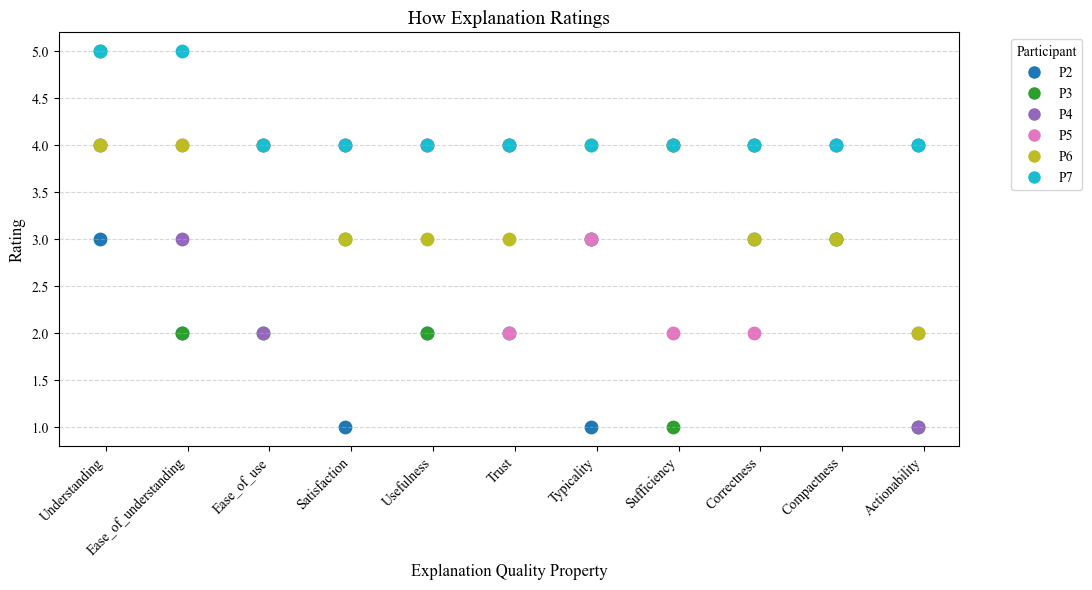

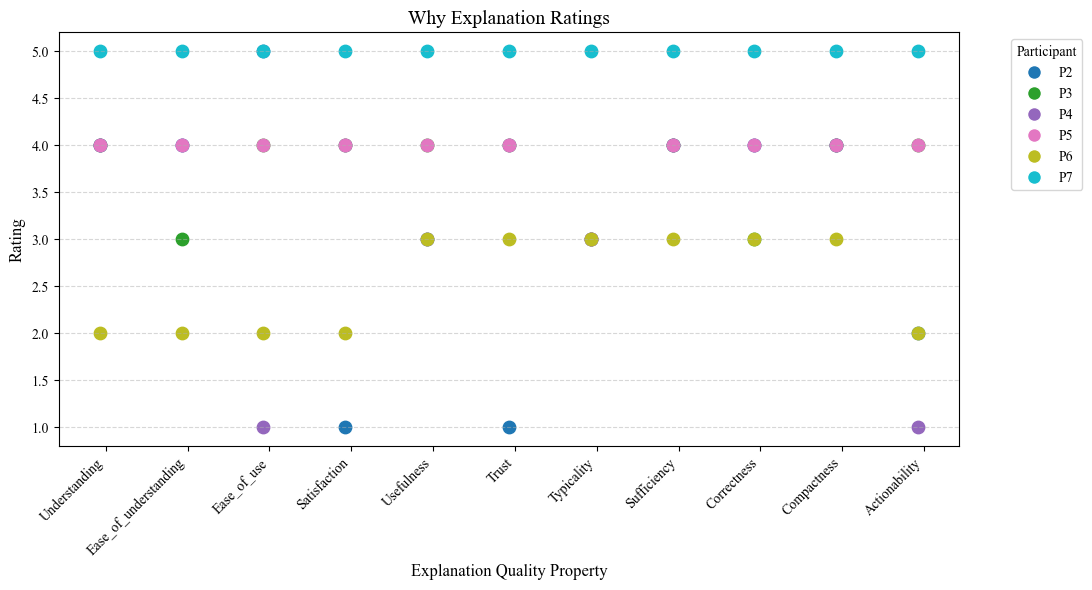

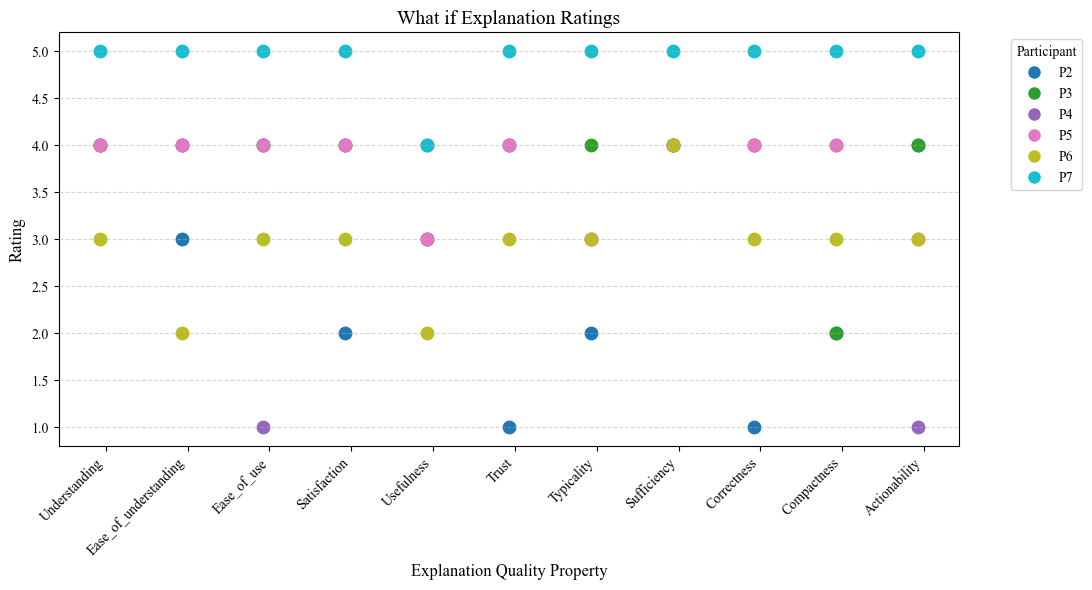

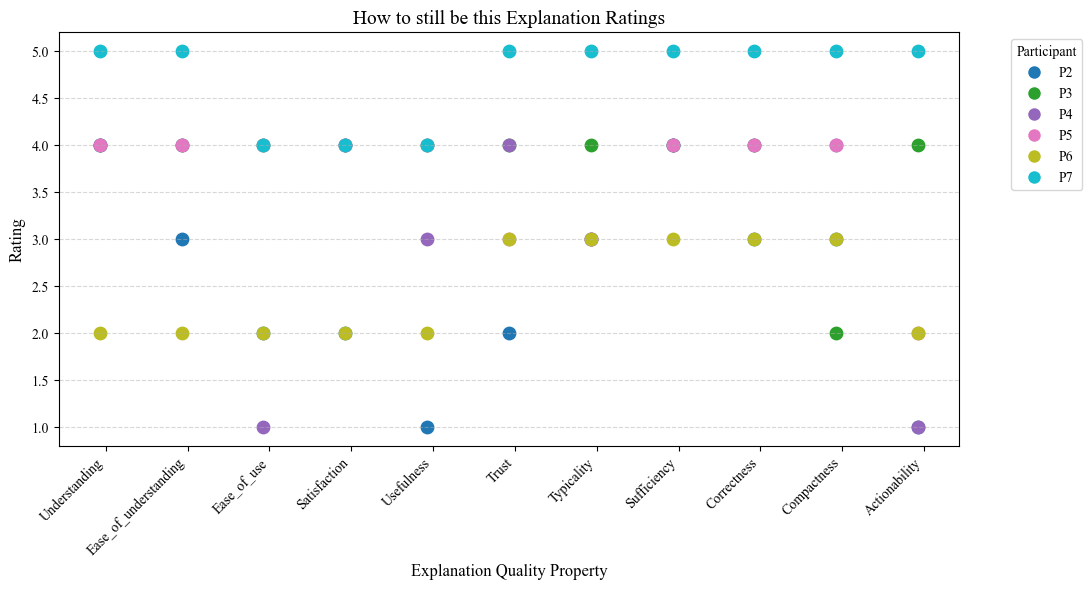

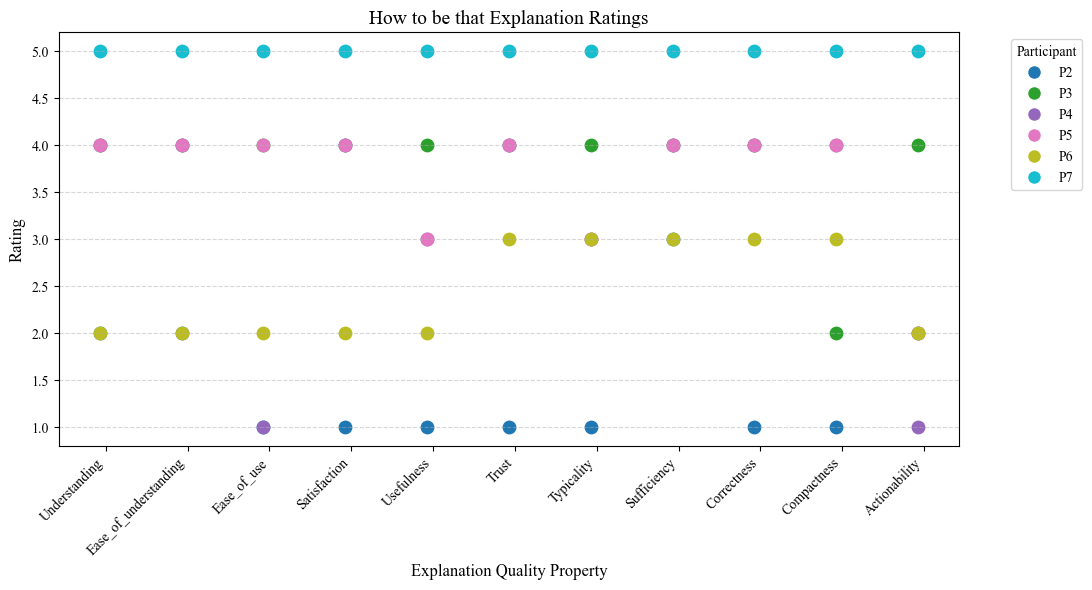

In [5]:
# Explanation types and properties
explanation_types = {
    'How': 'How',
    'Why': 'Why',
    'Whatif': 'What if',
    'Howtostillbethis': 'How to still be this',
    'Howtobethat': 'How to be that'
}
quality_properties = [
    'Understanding', 'Ease_of_understanding', 'Ease_of_use', 'Satisfaction',
    'Usefulness', 'Trust', 'Typicality', 'Sufficiency', 'Correctness',
    'Compactness', 'Actionability'
]

# Participants
participant_ids = clean_df.index.tolist()
num_participants = len(participant_ids)
colors = plt.cm.get_cmap('tab10', num_participants)  # Change colormap if >10 participants

# Ensure all rating columns are numeric
for expl_type in explanation_types.keys():
    for prop in quality_properties:
        col_name = f"{expl_type}_{prop}"
        if col_name in clean_df.columns:
            clean_df[col_name] = pd.to_numeric(clean_df[col_name], errors='coerce')


for expl_key, expl_label in explanation_types.items():
    plt.figure(figsize=(11, 6))
    
    # Property axis
    x_positions = range(len(quality_properties))
    
    # Plot each participant with jitter
    for i, pid in enumerate(participant_ids):
        rating_counts = {}  # Count duplicates per property/rating
        y_values = []
        x_offsets = []
        for j, prop in enumerate(quality_properties):
            col_name = f"{expl_key}_{prop}"
            if col_name in clean_df.columns:
                rating = clean_df.loc[pid, col_name]
                key = (j, rating)
                count = rating_counts.get(key, 0)
                offset = (count - 0.5) * 0.15  # fixed jitter
                rating_counts[key] = count + 1

                plt.scatter(j + offset, rating, color=colors(i), s=80,
                            label=f'P{pid}' if j == 0 else "")
    
    # Axis formatting
    plt.xticks(ticks=range(len(quality_properties)), labels=quality_properties, rotation=45, ha='right')
    plt.ylabel("Rating", fontsize=12)
    plt.xlabel("Explanation Quality Property", fontsize=12)
    plt.title(f"{expl_label} Explanation Ratings", fontsize=14)

    # Custom legend
    handles = [
        plt.Line2D([0], [0], marker='o', color='w', label=f'P{pid}',
                   markerfacecolor=colors(i), markersize=10)
        for i, pid in enumerate(participant_ids)
    ]
    plt.legend(handles=handles, title="Participant", bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)
    plt.show()

# Per quality criteria type

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Explanation types and readable labels
explanation_types = {
    'How': 'How',
    'Why': 'Why',
    'Whatif': 'What if',
    'Howtostillbethis': 'How to still be this',
    'Howtobethat': 'How to be that'
}
explanation_keys = list(explanation_types.keys())

# Quality properties (each will get a separate plot)
quality_properties = [
    'Understanding', 'Ease_of_understanding', 'Ease_of_use', 'Satisfaction',
    'Usefulness', 'Trust', 'Typicality', 'Sufficiency', 'Correctness',
    'Compactness', 'Actionability'
]

# Participants
participant_ids = clean_df.index.tolist()
num_participants = len(participant_ids)
colors = plt.cm.get_cmap('tab10', num_participants)

# Make sure ratings are numeric
for expl_key in explanation_keys:
    for prop in quality_properties:
        col = f"{expl_key}_{prop}"
        if col in clean_df.columns:
            clean_df[col] = pd.to_numeric(clean_df[col], errors='coerce')

# Now: plot per quality property
for prop in quality_properties:
    plt.figure(figsize=(10, 6))

    # Plot each participant's rating for each explanation type
    for i, pid in enumerate(participant_ids):
        rating_counts = {}  # For horizontal jitter
        for j, expl_key in enumerate(explanation_keys):
            col_name = f"{expl_key}_{prop}"
            if col_name in clean_df.columns:
                rating = clean_df.loc[pid, col_name]
                key = (j, rating)
                count = rating_counts.get(key, 0)
                offset = (count - 0.5) * 0.15
                rating_counts[key] = count + 1
                plt.scatter(j + offset, rating, color=colors(i), s=80,
                            label=f'P{pid}' if j == 0 else "")
    
    # Axis formatting
    plt.xticks(ticks=range(len(explanation_keys)),
               labels=[explanation_types[k] for k in explanation_keys],
               rotation=30, ha='right')
    plt.ylabel("Rating", fontsize=12)
    plt.xlabel("Explanation Type", fontsize=12)
    plt.title(f"{prop} Ratings by Explanation Type", fontsize=14)
    plt.ylim(1, 5)
    plt.yticks(ticks=range(1, 6))  # Only integer ticks

    # Custom legend
    handles = [
        plt.Line2D([0], [0], marker='o', color='w', label=f'P{pid}',
                   markerfacecolor=colors(i), markersize=10)
        for i, pid in enumerate(participant_ids)
    ]
    plt.legend(handles=handles, title="Participant", bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)
    plt.show()


In [7]:
clean_df

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,RecipientFirstName,RecipientEmail,ExternalReference,LocationLatitude,LocationLongitude,DistributionChannel,UserLanguage,Q2,Q3,How_Understanding,How_Ease_of_understanding,How_Ease_of_use,How_Satisfaction,How_Usefulness,How_Trust,How_Typicality,How_Sufficiency,How_Correctness,How_Compactness,How_Actionability,How_open,Why_Understanding,Why_Ease_of_understanding,Why_Ease_of_use,Why_Satisfaction,Why_Usefulness,Why_Trust,Why_Typicality,Why_Sufficiency,Why_Correctness,Why_Compactness,Why_Actionability,Whynot_open,Whatif_Understanding,Whatif_Ease_of_understanding,Whatif_Ease_of_use,Whatif_Satisfaction,Whatif_Usefulness,Whatif_Trust,Whatif_Typicality,Whatif_Sufficiency,Whatif_Correctness,Whatif_Compactness,Whatif_Actionability,Whatif_open,Howtostillbethis_Understanding,Howtostillbethis_Ease_of_understanding,Howtostillbethis_Ease_of_use,Howtostillbethis_Satisfaction,Howtostillbethis_Usefulness,Howtostillbethis_Trust,Howtostillbethis_Typicality,Howtostillbethis_Sufficiency,Howtostillbethis_Correctness,Howtostillbethis_Compactness,Howtostillbethis_Actionability,Howtostillbethis_open,Howtobethat_Understanding,Howtobethat_Ease_of_understanding,Howtobethat_Ease_of_use,Howtobethat_Satisfaction,Howtobethat_Usefulness,Howtobethat_Trust,Howtobethat_Typicality,Howtobethat_Sufficiency,Howtobethat_Correctness,Howtobethat_Compactness,Howtobethat_Actionability,Howtobethat_open
2,2025-05-31 14:01:54,2025-05-31 14:25:31,0,194.53.88.20,100,1417,1,2025-05-31 14:25:32,R_2PnUXWIS2uPVKIj,NaN,NaN,NaN,NaN,51.542,5.0878,anonymous,NL,3,Intensive care,3,2,4,1,2,2,1,4,3,3,4,De uitleg is niet actiegericht en ook niet pas...,4,4,5,1,3,1,3,4,4,4,2,"Contradictio: je kan niet zeggen ""advies: geen...",4,3,4,2,3,1,2,4,1,2,4,"Pas op dat je met ""wat als"" scenario's geen ca...",4,3,2,2,1,2,3,4,3,3,1,Dit vind ik een heel interessante en ben ik ze...,2,2,1,1,1,1,1,3,1,1,2,Zie mijn antwoord 2 vragen terug: je impliceer...
3,2025-06-16 03:27:08,2025-06-16 04:01:35,0,80.113.200.135,100,2066,1,2025-06-16 04:01:36,R_2MMrKZKDJmtd1gS,NaN,NaN,NaN,NaN,51.436,5.4966,anonymous,NL,3,NaN,5,2,2,3,2,4,3,1,4,3,1,Dit is voor de dagelijkse praktijk niet toegan...,4,3,4,4,4,4,3,4,3,4,4,het advies met de zekerheid maken het meer act...,4,4,4,4,4,4,4,4,4,2,4,"Erg leuke extra optie, maar alleen nuttig voor...",4,4,4,4,4,4,4,4,4,2,4,"Zelfde als net, alles is optioneel en leuke op...",4,4,4,4,4,4,4,4,4,2,4,Allemaal opties om vertrouwen te winnen in eer...
4,2025-06-25 10:18:58,2025-06-25 11:09:22,0,62.45.98.106,100,3024,1,2025-06-25 11:09:23,R_80Spei4za2MBZpy,NaN,NaN,NaN,NaN,51.7698,5.5709,anonymous,NL,3,Intensivist,4,3,2,4,4,4,3,4,4,4,1,Uitleg is prima om achtergrond van het model m...,4,4,1,4,3,4,3,4,4,4,1,Zelfde opmerking als vorige vraag,4,4,1,4,3,4,3,4,4,4,1,Zelfde commentaar als eerder. Verder suggereer...,4,4,1,4,3,4,3,4,4,4,1,Zelfde commentaar als vorige vraag.,4,4,1,4,3,4,3,4,4,4,1,Zelfde commentaar als vorige twee vragen
5,2025-06-27 07:14:38,2025-06-27 08:08:32,0,194.104.125.22,100,3233,1,2025-06-27 08:08:33,R_8MfgLKSEWa0X3rN,NaN,NaN,NaN,NaN,51.5883,4.8042,anonymous,NL,3,Intensive Care,4,4,4,4,4,2,3,2,2,4,2,Grafisch is het duidelijk weergegeven.\nAlles ...,4,4,4,4,4,4,3,4,4,4,4,Nu is wel duidelijk waarop het systeem is geba...,4,4,4,4,3,4,3,4,4,4,3,Ik zie hier alleen toegeve4ogde waarde in een ...,4,4,4,4,4,3,3,4,4,4,2,Oneens. Met een model met dergelijke brede bet...,4,4,4,4,3,4,3,4,4,4,2,Op zich is de uitleg nuttig en helder. Een der...
6,2025-06-27 15:33:54,2025-06-27 16:18:43,0,91.214.67.97,100,2688,1,2025-06-27 16:18:43,R_22KJ6Gu50fBwIdL,NaN,NaN,NaN,NaN,52.3759,4.8975,anonymous,NL,3,Intensivist,4,4,4,3,3,3,4,4,3,3,2,NaN,2,2,2,2,3,3,3,3,3,3,2,NaN,3,2,3,3,2,3,3,4,3,3,3,NaN,2,2,2,2,2,3,3,3,3,3,2,NaN,2,2,2,2,2,3,3,3,3,3,2,NaN
7,2025-07-01 16:11:42,2025-07-01 16:19:31,0,212.178.79.162,100,469,1,2025-07-01 16:19:32,R_82InTyemkQc9625,NaN,NaN,NaN,NaN,52.3564,6.6698,anony

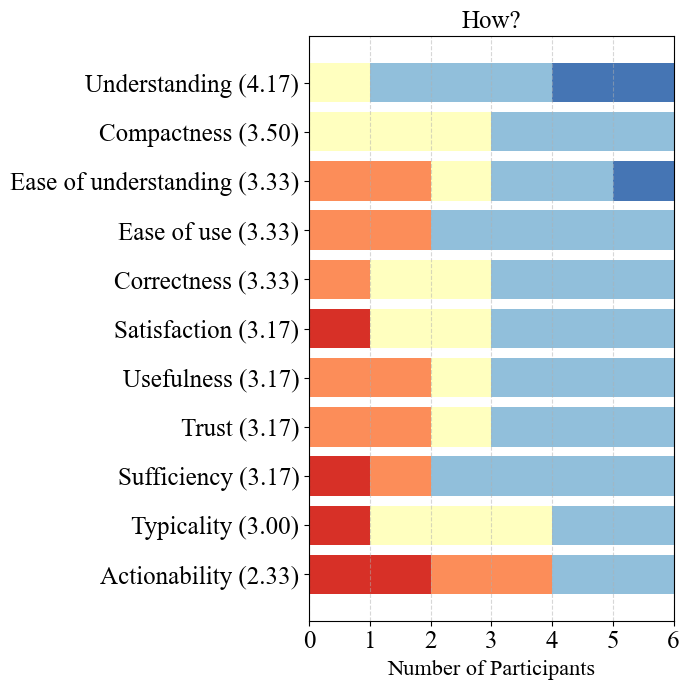

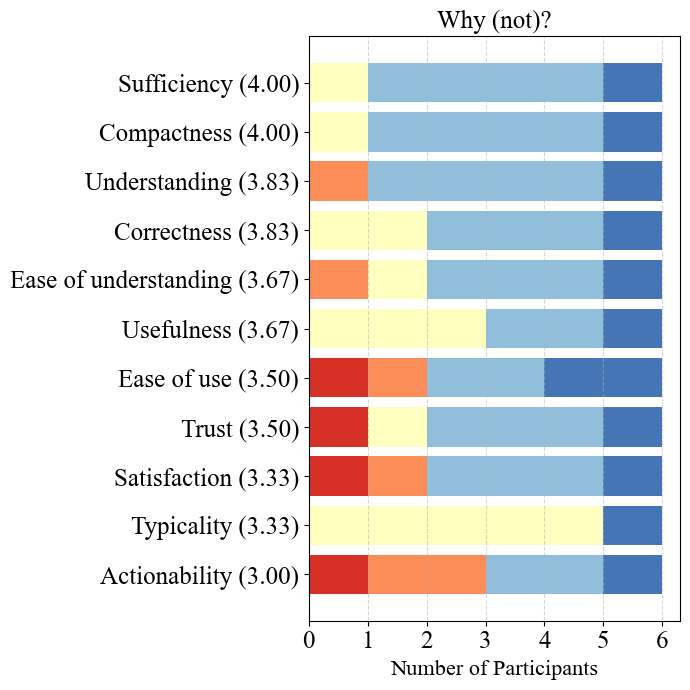

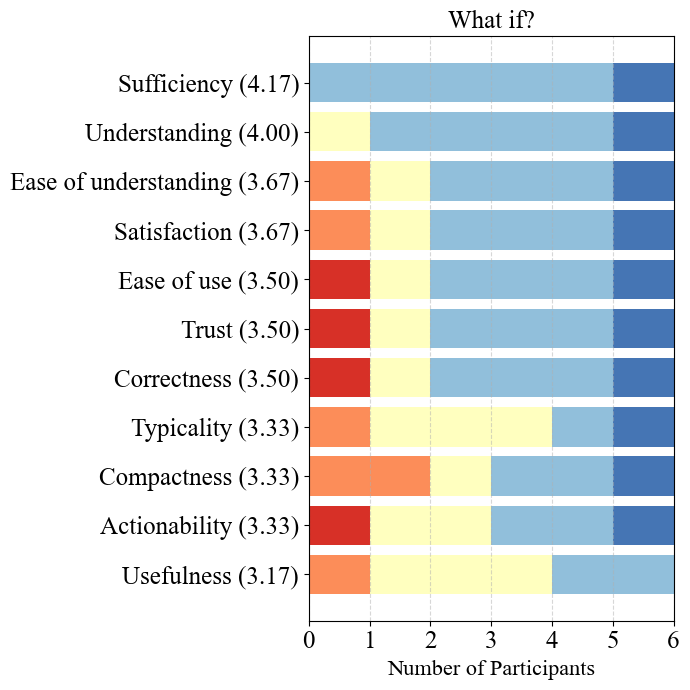

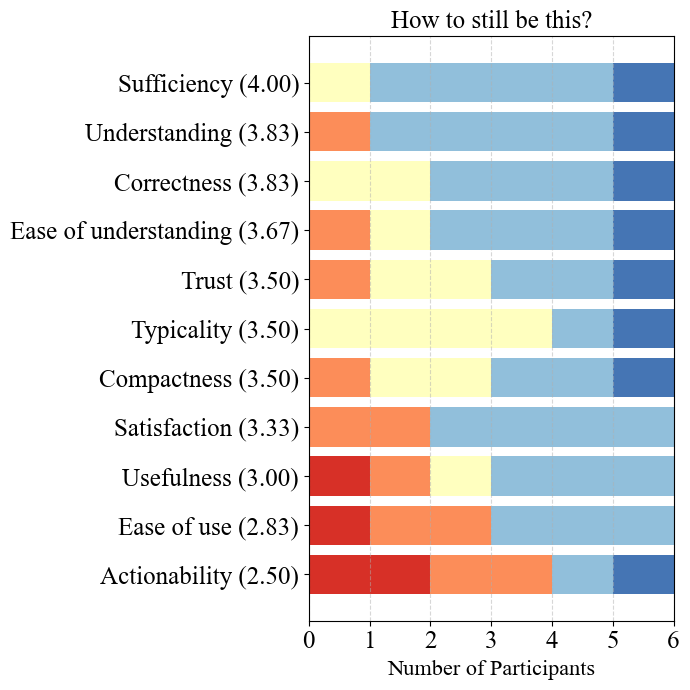

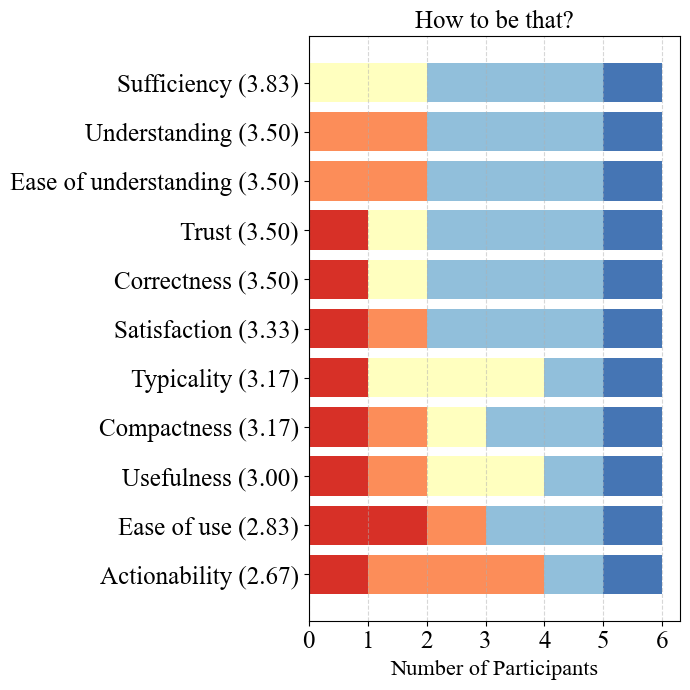

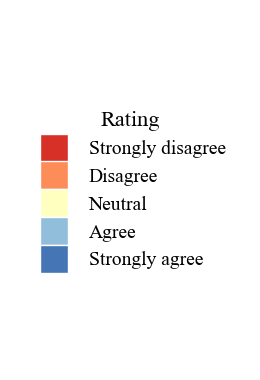

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Explanation types
explanation_types = {
    'How': 'How?',
    'Why': 'Why (not)?',
    'Whatif': 'What if?',
    'Howtostillbethis': 'How to still be this?',
    'Howtobethat': 'How to be that?'
}

# Likert mapping and colors
likert_map = {
    1: 'Strongly disagree',
    2: 'Disagree',
    3: 'Neutral',
    4: 'Agree',
    5: 'Strongly agree'
}
likert_order = list(likert_map.values())
likert_colors = ['#d73027', '#fc8d59', '#ffffbf', '#91bfdb', '#4575b4']

# For calculating average Likert score
likert_numeric = {
    'Strongly disagree': 1,
    'Disagree': 2,
    'Neutral': 3,
    'Agree': 4,
    'Strongly agree': 5
}

# Quality properties
quality_properties = [
    'Understanding', 'Ease_of_understanding', 'Ease_of_use', 'Satisfaction',
    'Usefulness', 'Trust', 'Typicality', 'Sufficiency', 'Correctness',
    'Compactness', 'Actionability'
]

# Optional: Pretty display names for quality properties
property_display_names = {
    'Understanding': 'Understanding',
    'Ease_of_understanding': 'Ease of understanding',
    'Ease_of_use': 'Ease of use',
    'Satisfaction': 'Satisfaction',
    'Usefulness': 'Usefulness',
    'Trust': 'Trust',
    'Typicality': 'Typicality',
    'Sufficiency': 'Sufficiency',
    'Correctness': 'Correctness',
    'Compactness': 'Compactness',
    'Actionability': 'Actionability'
}

# Work on a copy
df_likert = clean_df.copy()

# Map Likert values
for prop in quality_properties:
    for expl_key in explanation_types:
        col = f"{expl_key}_{prop}"
        if col in df_likert.columns:
            df_likert[col] = pd.to_numeric(df_likert[col], errors='coerce')
            df_likert[col] = df_likert[col].replace(likert_map)

# 📊 Plot per explanation type
for expl_key, expl_label in explanation_types.items():
    df_plot = pd.DataFrame()

    for prop in quality_properties:
        col = f"{expl_key}_{prop}"
        if col in df_likert.columns:
            counts = df_likert[col].value_counts().reindex(likert_order, fill_value=0)
            df_plot[prop] = counts

    # Transpose: rows = properties, columns = likert levels
    df_plot = df_plot.T

    # Compute average Likert score for sorting
    avg_scores = df_plot.mul(pd.Series(likert_numeric)).sum(axis=1) / df_plot.sum(axis=1)

    # Sort the DataFrame by average score (descending)
    df_plot = df_plot.loc[avg_scores.sort_values(ascending=False).index]
    avg_scores = avg_scores.loc[df_plot.index]  # Reorder to match df_plot

    # Update y-axis labels to include mean score
    df_plot.index = [
        f"{property_display_names.get(prop, prop)} ({avg_scores[prop]:.2f})"
        for prop in avg_scores.index
    ]

    # Plot
    plt.figure(figsize=(7, 7))
    left = np.zeros(len(df_plot))

    for i, level in enumerate(likert_order):
        plt.barh(df_plot.index, df_plot[level], left=left, color=likert_colors[i], label=level)
        left += df_plot[level]

    plt.xlabel("Number of Participants", fontsize=16)
    plt.title(f"{expl_label}", fontsize=18)
    plt.yticks(fontsize=18)
    plt.xticks(fontsize=18)
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.gca().invert_yaxis()  # Highest average at the top
    plt.tight_layout()
    plt.show()

# 📏 Improved vertical Likert legend (larger, less whitespace)
legend_elements = [
    Line2D([0], [0], marker='s', color='w', label=label,
           markerfacecolor=color, markersize=20)
    for label, color in zip(likert_order, likert_colors)
]

fig, ax = plt.subplots(figsize=(3, 4))  # More compact and tall
ax.legend(
    handles=legend_elements,
    title="Rating",
    title_fontsize=16,
    fontsize=14,
    loc='center',
    frameon=False,
    ncol=1
)
ax.axis('off')
plt.subplots_adjust(left=0.1, right=0.9, top=0.95, bottom=0.05)
plt.show()


[1, 2, 3, 4, 5, 6]

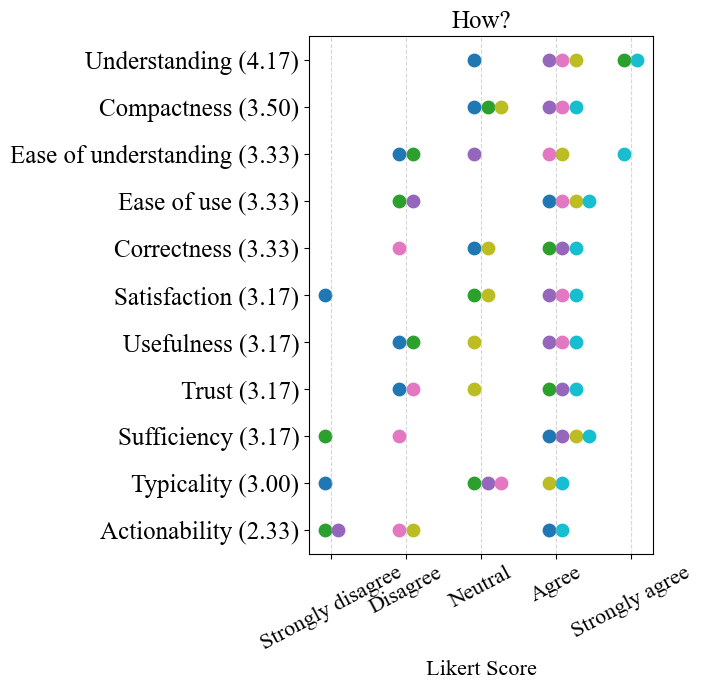

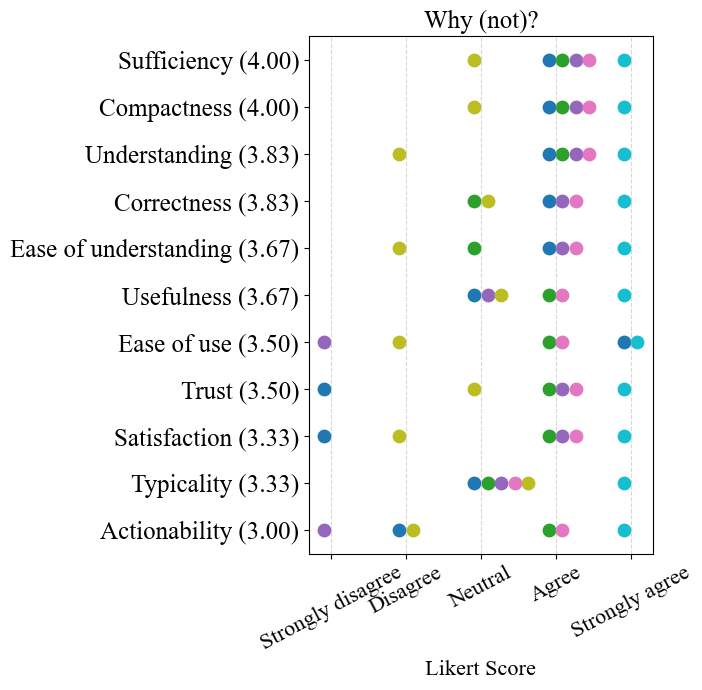

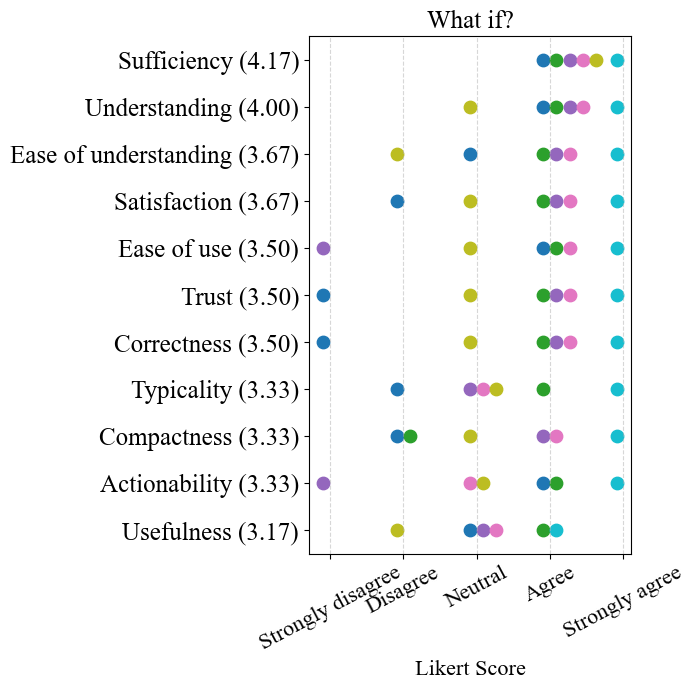

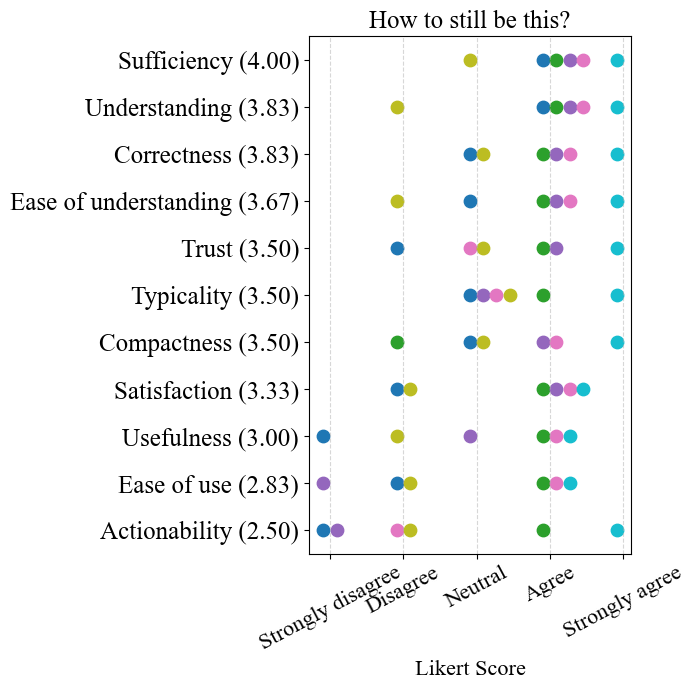

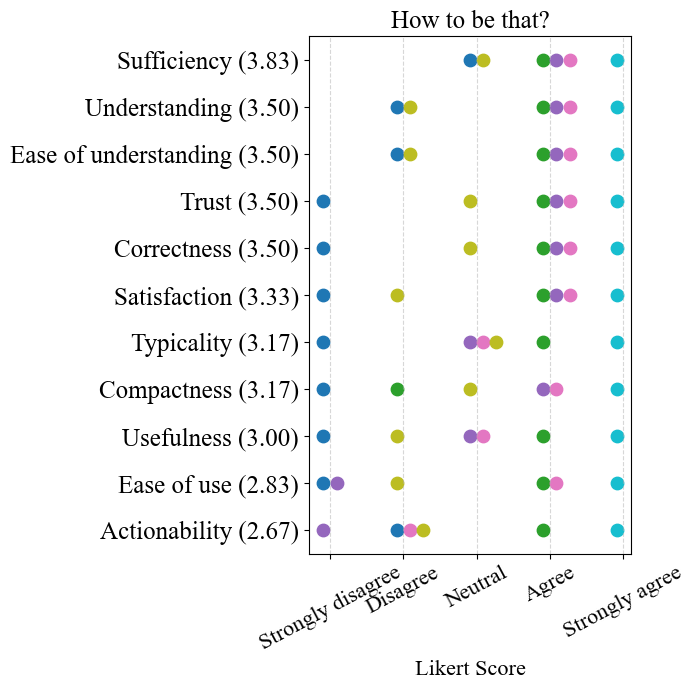

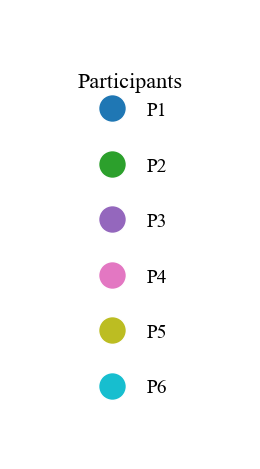

In [106]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.lines import Line2D
import matplotlib.cm as cm

# Assign participant IDs (if not already assigned)
clean_df['participant_id'] = [x for x in range(1, 7)]

# Use consistent tab10 color scheme
participants = clean_df['participant_id'].values
colors = cm.get_cmap('tab10', len(participants))
participant_color_map = {pid: colors(i) for i, pid in enumerate(participants)}

# Plot for each explanation type
for expl_key, expl_label in explanation_types.items():
    plt.figure(figsize=(7, 7))

    # Calculate average scores for sorting and display
    avg_scores = []
    for prop in quality_properties:
        col = f"{expl_key}_{prop}"
        if col in clean_df.columns:
            avg = pd.to_numeric(clean_df[col], errors='coerce').mean()
            avg_scores.append((prop, avg))
        else:
            avg_scores.append((prop, -np.inf))  # If column is missing

    # Sort properties by average score descending
    sorted_quality_properties = [p for p, _ in sorted(avg_scores, key=lambda x: x[1], reverse=True)]
    sorted_labels = [f"{property_display_names[p]} ({avg:.2f})"
                     for p, avg in sorted(avg_scores, key=lambda x: x[1], reverse=True)]

    # Plot data points with jitter
    for y_idx, prop in enumerate(sorted_quality_properties):
        col = f"{expl_key}_{prop}"
        if col not in clean_df.columns:
            continue

        rating_counts = {}  # Track count of each (score, y_idx) combo

        for idx, row in clean_df.iterrows():
            pid = row['participant_id']
            score = row[col]

            if pd.notna(score) and score in range(1, 6):
                key = (y_idx, score)
                count = rating_counts.get(key, 0)
                offset = (count - 0.5) * 0.18  # Spread horizontally
                rating_counts[key] = count + 1

                plt.scatter(
                    x=score + offset,
                    y=y_idx,
                    color=participant_color_map[pid],
                    s=80,
                )

    # Y-axis: sorted + average score annotations
    plt.yticks(ticks=range(len(sorted_quality_properties)),
               labels=sorted_labels,
               fontsize=18)

    # X-axis: Likert ticks
    plt.xticks(ticks=list(likert_numeric.values()),
               labels=list(likert_numeric.keys()),
               fontsize=16, rotation=28)

    plt.xlabel("Likert Score", fontsize=16)
    plt.title(f"{expl_label}", fontsize=18)
    plt.grid(True, axis='x', linestyle='--', alpha=0.5)

    # Legend for participant colors
    handles = [
        Line2D([], [], marker='o', color='w',
               markerfacecolor=participant_color_map[pid],
               markeredgecolor='black', label=f"P{pid}", markersize=10)
        for pid in participants
    ]

    plt.gca().invert_yaxis()  # Highest-rated property at the top
    plt.tight_layout()
    plt.show()


# 📏 Improved vertical participant legend with spacing
legend_elements = []
for i, (pid, color) in enumerate(participant_color_map.items()):
    legend_elements.append(
        Line2D([0], [0], marker='o', color='w', label=f"P{pid}",
               markerfacecolor=color, markersize=20)
    )
    # Add a transparent spacer after each item (except last)
    if i < len(participant_color_map) - 1:
        legend_elements.append(
            Line2D([0], [0], marker='o', color='w', label=" ", alpha=0)
        )

# Create a compact tall figure for the legend
fig, ax = plt.subplots(figsize=(3, 5))  # Slightly taller for spacing
ax.legend(
    handles=legend_elements,
    title="Participants",
    title_fontsize=16,
    fontsize=14,
    loc='center',
    frameon=False,
    ncol=1
)
ax.axis('off')
plt.subplots_adjust(left=0.1, right=0.9, top=0.95, bottom=0.05)
plt.show()


# Summary Table

In [30]:
import pandas as pd

# Create DataFrame to collect results
summary_data = []

for expl_key, expl_label in explanation_types.items():
    for prop in quality_properties:
        col = f"{expl_key}_{prop}"
        if col in df_likert.columns:
            # Convert from Likert text to numeric
            numeric_col = df_likert[col].replace(likert_numeric)
            numeric_col = pd.to_numeric(numeric_col, errors='coerce')
            avg = numeric_col.mean()
            std = numeric_col.std()
            summary_data.append({
                'Explanation': expl_label,
                'Property': property_display_names[prop],
                'Formatted': f"{avg:.2f} (SD = {std:.2f})",
                'Average': avg
            })

# Convert to DataFrame
summary_df = pd.DataFrame(summary_data)

# Pivot to table with formatted text
pivot_formatted = summary_df.pivot(index='Property', columns='Explanation', values='Formatted')

# Compute average of averages
avg_row = summary_df.groupby("Explanation")["Average"].mean().round(2).astype(str)
pivot_formatted.loc['Average'] = avg_row

# Reorder rows to match your original table
desired_order = [
    'Understanding',
    'Ease of understanding',
    'Ease of use',
    'Satisfaction',
    'Usefulness',
    'Trust',
    'Typicality',
    'Sufficiency',
    'Correctness',
    'Compactness',
    'Actionability',
    'Average'
]

pivot_formatted = pivot_formatted.reindex(desired_order)

# Display final result
print("Average Likert Scores with SD (ordered):")
print(pivot_formatted)

Average Likert Scores with SD (ordered):
Explanation             How to be that? How to still be this?  \
Property                                                        
Understanding          3.50 (SD = 1.22)      3.83 (SD = 0.98)   
Ease of understanding  3.50 (SD = 1.22)      3.67 (SD = 1.03)   
Ease of use            2.83 (SD = 1.72)      2.83 (SD = 1.33)   
Satisfaction           3.33 (SD = 1.51)      3.33 (SD = 1.03)   
Usefulness             3.00 (SD = 1.41)      3.00 (SD = 1.26)   
Trust                  3.50 (SD = 1.38)      3.50 (SD = 1.05)   
Typicality             3.17 (SD = 1.33)      3.50 (SD = 0.84)   
Sufficiency            3.83 (SD = 0.75)      4.00 (SD = 0.63)   
Correctness            3.50 (SD = 1.38)      3.83 (SD = 0.75)   
Compactness            3.17 (SD = 1.47)      3.50 (SD = 1.05)   
Actionability          2.67 (SD = 1.51)      2.50 (SD = 1.64)   
Average                            3.27                  3.41   

Explanation                        How?         

C:\Users\FerroFast\AppData\Local\Temp\ipykernel_15392\3669385591.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  numeric_col = df_likert[col].replace(likert_numeric)


## Ranking

In [26]:
rank_cols = [f"rank{i}" for i in range(1, 10)]
ranks_df = clean_df[rank_cols].dropna(how="all")

In [27]:
ranks_df

,rank1,rank2,rank3,rank4,rank5,rank6,rank7,rank8,rank9
3,"""Prestatie"" - de nauwkeurigheid, precisie en b...","""Data"" - de gegevens waarop het systeem gebase...","""Output"" - de adviezen/uitkomsten die het syst...","""Hoeveel kan er veranderen zonder dat?"" - de m...","""Waarom?""- de factoren/patiënt gegevens die ve...","""Wat als?"" - welk advies het systeem zou geven...","""Hoeveel/wat moet er veranderen zodat?"" - welk...","""Waarom niet?"" - de factoren/patiënt gegevens ...","""Hoe?"" - de onderliggende logica en werking va..."
4,"""Output"" - de adviezen/uitkomsten die het syst...","""Prestatie"" - de nauwkeurigheid, precisie en b...","""Data"" - de gegevens waarop het systeem gebase...","""Waarom?""- de factoren/patiënt gegevens die ve...","""Hoe?"" - de onderliggende logica en werking va...","""Wat als?"" - welk advies het systeem zou geven...","""Waarom niet?"" - de factoren/patiënt gegevens ...","""Hoeveel/wat moet er veranderen zodat?"" - welk...","""Hoeveel kan er veranderen zonder dat?"" - de m..."
5,"""Prestatie"" - de nauwkeurigheid, precisie en b...","""Hoe?"" - de onderliggende logica en werking va...","""Waarom?""- de factoren/patiënt gegevens die ve...","""Waarom niet?"" - de factoren/patiënt gegevens ...","""Hoeveel/wat moet er veranderen zodat?"" - welk...","""Hoeveel kan er veranderen zonder dat?"" - de m...","""Wat als?"" - welk advies het systeem zou geven...","""Data"" - de gegevens waarop het systeem gebase...","""Output"" - de adviezen/uitkomsten die het syst..."
6,"""Prestatie"" - de nauwkeurigheid, precisie en b...","""Waarom?""- de factoren/patiënt gegevens die ve...","""Output"" - de adviezen/uitkomsten die het syst...","""Hoe?"" - de onderliggende logica en werking va...","""Data"" - de gegevens waarop het systeem gebase...","""Waarom niet?"" - de factoren/patiënt gegevens ...","""Hoeveel/wat moet er veranderen zodat?"" - welk...","""Hoeveel kan er veranderen zonder dat?"" - de m...","""Wat als?"" - welk advies het systeem zou geven..."
7,"""Data"" - de gegevens waarop het systeem gebase...","""Hoe?"" - de onderliggende logica en werking va...","""Waarom?""- de factoren/patiënt gegevens die ve...","""Wat als?"" - welk advies het systeem zou geven...","""Hoeveel kan er veranderen zonder dat?"" - de m...","""Hoeveel/wat moet er veranderen zodat?"" - welk...","""Prestatie"" - de nauwkeurigheid, precisie en b...","""Waarom niet?"" - de factoren/patiënt gegevens ...","""Output"" - de adviezen/uitkomsten die het syst..."
8,"""Hoe?"" - de onderliggende logica en werking va...","""Output"" - de adviezen/uitkomsten die het syst...","""Data"" - de gegevens waarop het systeem gebase...","""Prestatie"" - de nauwkeurigheid, precisie en b...","""Waarom?""- de factoren/patiënt gegevens die ve...","""Waarom niet?"" - de factoren/patiënt gegevens ...","""Hoeveel kan er veranderen zonder dat?"" - de m...","""Hoeveel/wat moet er veranderen zodat?"" - welk...","""Wat als?"" - welk advies het systeem zou geven..."
9,"""Output"" - de adviezen/uitkomsten die het syst...","""Prestatie"" - de nauwkeurigheid, precisie en b...","""Waarom?""- de factoren/patiënt gegevens die ve...","""Data"" - de gegevens waarop het systeem gebase...","""Waarom niet?"" - de factoren/patiënt gegevens ...","""Hoe?"" - de onderliggende logica en werking va...","""Hoeveel/wat moet er veranderen zodat?"" - welk...","""Hoeveel kan er veranderen zonder dat?"" - de m...","""Wat als?"" - welk advies het systeem zou geven..."
10,"""Output"" - de adviezen/uitkomsten die het syst...","""Hoeveel/wat moet er veranderen zodat?"" - welk...","""Data"" - de gegevens waarop het systeem gebase...","""Waarom?""- de factoren/patiënt gegevens die ve...","""Waarom niet?"" - de factoren/patiënt gegevens ...","""Hoe?"" - de onderliggende logica en werking va...","""Prestatie"" - de nauwkeurigheid, precisie en b...","""Wat als?"" - welk advies het systeem zou geven...","""Hoeveel kan er veranderen zonder dat?"" - de m..."
11,"""Hoe?"" - de onderliggende logica e

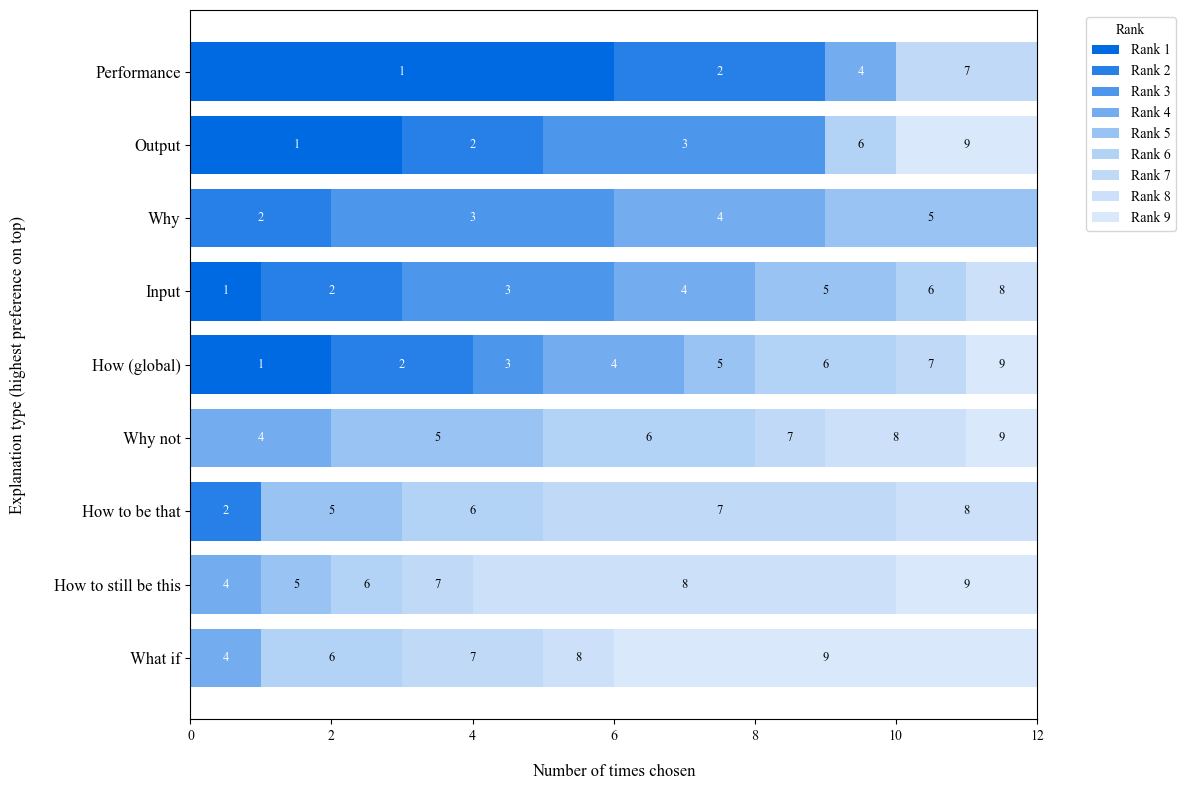

In [28]:
def extract_short(text):
    match = re.search(r'"(.*?)"', str(text))
    return match.group(1) if match else str(text)

for col in rank_cols:
    ranks_df[col] = ranks_df[col].apply(extract_short)

# --- Step 2: Translate explanation types from Dutch to English ---
explanation_translation = {
    "Prestatie": "Performance",
    "Data": "Input",
    "Waarom?": "Why",
    "Hoe?": "How (global)",
    "Output": "Output",
    "Hoeveel kan er veranderen zonder dat?": "How to still be this",
    "Waarom niet?": "Why not",
    "Hoeveel/wat moet er veranderen zodat?": "How to be that",
    "Wat als?": "What if"
}

# --- Step 3: Prepare long format and compute average ranks ---
long_df = pd.melt(ranks_df, value_vars=rank_cols, var_name="rank_position", value_name="explanation")
long_df["rank_num"] = long_df["rank_position"].str.extract(r"(\d+)").astype(int)
avg_ranks = long_df.groupby("explanation")["rank_num"].mean().sort_values()

# --- Step 4: Count how often each explanation was chosen per rank ---
ranking_counts = {rank: ranks_df[rank].value_counts() for rank in rank_cols}
ranking_df = pd.DataFrame(ranking_counts).fillna(0).astype(int)

# Apply short name extraction and translation to the index
ranking_df.index = ranking_df.index.to_series().apply(extract_short)
ranking_df = ranking_df.loc[avg_ranks.index]  # reorder
ranking_df.index = ranking_df.index.to_series().map(explanation_translation)  # translate
ranking_df.columns = [f"Rank {i}" for i in range(1, 10)]

# --- Step 5: Plot settings ---
alphas = [1.0, 0.85, 0.7, 0.55, 0.4, 0.3, 0.25, 0.2, 0.15]
fig, ax = plt.subplots(figsize=(12, 8))
bottoms = [0] * len(ranking_df)

# --- Step 6: Plot the horizontal stacked bar chart ---
for i, col in enumerate(ranking_df.columns):
    values = ranking_df[col]
    bars = ax.barh(ranking_df.index, values, left=bottoms, 
                   color= custom_color, alpha=alphas[i], label=col)
    
    for bar, val in zip(bars, values):
        if val > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + bar.get_height() / 2,
                str(i + 1),  # rank number
                ha='center', va='center',
                fontsize=9, color='white' if alphas[i] > 0.4 else 'black'
            )
    
    bottoms = [bottoms[j] + values.iloc[j] for j in range(len(values))]

# --- Final touches ---
ax.invert_yaxis()
ax.set_xlabel("Number of times chosen", fontsize=12, labelpad=15, fontname="Times New Roman")
ax.set_ylabel("Explanation type (highest preference on top)", fontsize=12, labelpad=20, fontname="Times New Roman")
plt.yticks(fontsize=labelsize, fontname=font)
ax.legend(title="Rank", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [29]:
# Rank column names
rank_cols = [f"Rank {i}" for i in range(1, 10)]

# Calculate average rank and standard deviation
average_ranks = []
std_devs = []

for _, row in ranking_df.iterrows():
    counts = row[rank_cols].values.astype(int)  # ensure integer counts
    values = np.repeat(np.arange(1, len(rank_cols)+1), counts)  # repeat rank numbers
    average_ranks.append(round(values.mean(), 2))
    std_devs.append(round(values.std(), 2))

# Add results to DataFrame
ranking_df['Average Rank'] = average_ranks
ranking_df['Standard Deviation'] = std_devs

# Output the final DataFrame
print(ranking_df[['Average Rank', 'Standard Deviation']])

                      Average Rank  Standard Deviation
explanation                                           
Performance                   2.50                2.18
Output                        3.58                2.75
Why                           3.58                1.04
Input                         3.83                1.86
How (global)                  4.17                2.41
Why not                       6.08                1.55
How to be that                6.25                1.59
How to still be this          7.33                1.49
What if                       7.67                1.60


In [30]:
# Convert each row to a dictionary of {info_type: rank}
restructured_data = []
for row in ranks_df.itertuples(index=False):
    participant_dict = {info_type: rank + 1 for rank, info_type in enumerate(row)}
    restructured_data.append(participant_dict)

# Create the new DataFrame
transformed_df = pd.DataFrame(restructured_data)

# Reorder the columns
transformed_df.columns = ['Performance', 'Input', 'Output', 'How to still be this', 'Why', 'What if', 'How to be that', 'Why not', 'How']
transformed_df

,Performance,Input,Output,How to still be this,Why,What if,How to be that,Why not,How
0,1,2,3,4,5,6,7,8,9
1,2,3,1,9,4,6,8,7,5
2,1,8,9,6,3,7,5,4,2
3,1,5,3,8,2,9,7,6,4
4,7,1,9,5,3,4,6,8,2
5,4,3,2,7,5,9,8,6,1
6,2,4,1,8,3,9,7,5,6
7,7,3,1,9,4,8,2,5,6
8,2,5,3,8,4,7,6,9,1
9,1,6,2,8,3,9,5,4,7


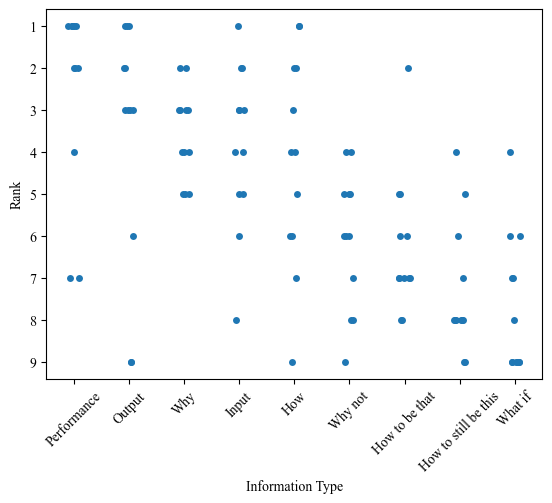

In [31]:
# Melt the DataFrame to long format
df_melted = transformed_df.melt(var_name='Information Type', value_name='Rank')

# Calculate mean rank per Information Type
order = df_melted.groupby('Information Type')['Rank'].mean().sort_values().index

# Create the violin plot with sorted x-axis
sns.stripplot(data=df_melted, x="Information Type", y="Rank", jitter=True, order=order)
plt.xticks(rotation=45)
plt.gca().invert_yaxis()
plt.show()

## 100 dollar Method

In [32]:
point_columns = [f"rank{i}" for i in list(range(1,10))]
rank_cols


['Rank 1',
 'Rank 2',
 'Rank 3',
 'Rank 4',
 'Rank 5',
 'Rank 6',
 'Rank 7',
 'Rank 8',
 'Rank 9']

In [33]:
clean_df[point_columns]

,rank1,rank2,rank3,rank4,rank5,rank6,rank7,rank8,rank9
3,"""Prestatie"" - de nauwkeurigheid, precisie en b...","""Data"" - de gegevens waarop het systeem gebase...","""Output"" - de adviezen/uitkomsten die het syst...","""Hoeveel kan er veranderen zonder dat?"" - de m...","""Waarom?""- de factoren/patiënt gegevens die ve...","""Wat als?"" - welk advies het systeem zou geven...","""Hoeveel/wat moet er veranderen zodat?"" - welk...","""Waarom niet?"" - de factoren/patiënt gegevens ...","""Hoe?"" - de onderliggende logica en werking va..."
4,"""Output"" - de adviezen/uitkomsten die het syst...","""Prestatie"" - de nauwkeurigheid, precisie en b...","""Data"" - de gegevens waarop het systeem gebase...","""Waarom?""- de factoren/patiënt gegevens die ve...","""Hoe?"" - de onderliggende logica en werking va...","""Wat als?"" - welk advies het systeem zou geven...","""Waarom niet?"" - de factoren/patiënt gegevens ...","""Hoeveel/wat moet er veranderen zodat?"" - welk...","""Hoeveel kan er veranderen zonder dat?"" - de m..."
5,"""Prestatie"" - de nauwkeurigheid, precisie en b...","""Hoe?"" - de onderliggende logica en werking va...","""Waarom?""- de factoren/patiënt gegevens die ve...","""Waarom niet?"" - de factoren/patiënt gegevens ...","""Hoeveel/wat moet er veranderen zodat?"" - welk...","""Hoeveel kan er veranderen zonder dat?"" - de m...","""Wat als?"" - welk advies het systeem zou geven...","""Data"" - de gegevens waarop het systeem gebase...","""Output"" - de adviezen/uitkomsten die het syst..."
6,"""Prestatie"" - de nauwkeurigheid, precisie en b...","""Waarom?""- de factoren/patiënt gegevens die ve...","""Output"" - de adviezen/uitkomsten die het syst...","""Hoe?"" - de onderliggende logica en werking va...","""Data"" - de gegevens waarop het systeem gebase...","""Waarom niet?"" - de factoren/patiënt gegevens ...","""Hoeveel/wat moet er veranderen zodat?"" - welk...","""Hoeveel kan er veranderen zonder dat?"" - de m...","""Wat als?"" - welk advies het systeem zou geven..."
7,"""Data"" - de gegevens waarop het systeem gebase...","""Hoe?"" - de onderliggende logica en werking va...","""Waarom?""- de factoren/patiënt gegevens die ve...","""Wat als?"" - welk advies het systeem zou geven...","""Hoeveel kan er veranderen zonder dat?"" - de m...","""Hoeveel/wat moet er veranderen zodat?"" - welk...","""Prestatie"" - de nauwkeurigheid, precisie en b...","""Waarom niet?"" - de factoren/patiënt gegevens ...","""Output"" - de adviezen/uitkomsten die het syst..."
8,"""Hoe?"" - de onderliggende logica en werking va...","""Output"" - de adviezen/uitkomsten die het syst...","""Data"" - de gegevens waarop het systeem gebase...","""Prestatie"" - de nauwkeurigheid, precisie en b...","""Waarom?""- de factoren/patiënt gegevens die ve...","""Waarom niet?"" - de factoren/patiënt gegevens ...","""Hoeveel kan er veranderen zonder dat?"" - de m...","""Hoeveel/wat moet er veranderen zodat?"" - welk...","""Wat als?"" - welk advies het systeem zou geven..."
9,"""Output"" - de adviezen/uitkomsten die het syst...","""Prestatie"" - de nauwkeurigheid, precisie en b...","""Waarom?""- de factoren/patiënt gegevens die ve...","""Data"" - de gegevens waarop het systeem gebase...","""Waarom niet?"" - de factoren/patiënt gegevens ...","""Hoe?"" - de onderliggende logica en werking va...","""Hoeveel/wat moet er veranderen zodat?"" - welk...","""Hoeveel kan er veranderen zonder dat?"" - de m...","""Wat als?"" - welk advies het systeem zou geven..."
10,"""Output"" - de adviezen/uitkomsten die het syst...","""Hoeveel/wat moet er veranderen zodat?"" - welk...","""Data"" - de gegevens waarop het systeem gebase...","""Waarom?""- de factoren/patiënt gegevens die ve...","""Waarom niet?"" - de factoren/patiënt gegevens ...","""Hoe?"" - de onderliggende logica en werking va...","""Prestatie"" - de nauwkeurigheid, precisie en b...","""Wat als?"" - welk advies het systeem zou geven...","""Hoeveel kan er veranderen zonder dat?"" - de m..."
11,"""Hoe?"" - de onderliggende logica e

In [34]:
clean_df

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q5_9,rank1,rank2,rank3,rank4,rank5,rank6,rank7,rank8,rank9
3,2025-04-04 11:05:03,2025-04-04 11:14:24,IP Address,5.59.202.8,100,560,True,2025-04-04 11:14:26,R_8fOdjeQ2gYAkL1W,NaN,...,0,"""Prestatie"" - de nauwkeurigheid, precisie en b...","""Data"" - de gegevens waarop het systeem gebase...","""Output"" - de adviezen/uitkomsten die het syst...","""Hoeveel kan er veranderen zonder dat?"" - de m...","""Waarom?""- de factoren/patiënt gegevens die ve...","""Wat als?"" - welk advies het systeem zou geven...","""Hoeveel/wat moet er veranderen zodat?"" - welk...","""Waarom niet?"" - de factoren/patiënt gegevens ...","""Hoe?"" - de onderliggende logica en werking va..."
4,2025-04-04 20:21:58,2025-04-04 20:28:50,IP Address,89.98.60.211,100,412,True,2025-04-04 20:28:51,R_2xRlovdL1cf7E89,NaN,...,6,"""Output"" - de adviezen/uitkomsten die het syst...","""Prestatie"" - de nauwkeurigheid, precisie en b...","""Data"" - de gegevens waarop het systeem gebase...","""Waarom?""- de factoren/patiënt gegevens die ve...","""Hoe?"" - de onderliggende logica en werking va...","""Wat als?"" - welk advies het systeem zou geven...","""Waarom niet?"" - de factoren/patiënt gegevens ...","""Hoeveel/wat moet er veranderen zodat?"" - welk...","""Hoeveel kan er veranderen zonder dat?"" - de m..."
5,2025-04-05 15:50:07,2025-04-05 15:56:03,IP Address,217.121.70.214,100,355,True,2025-04-05 15:56:03,R_2zdq3AoeVrxSKOM,NaN,...,0,"""Prestatie"" - de nauwkeurigheid, precisie en b...","""Hoe?"" - de onderliggende logica en werking va...","""Waarom?""- de factoren/patiënt gegevens die ve...","""Waarom niet?"" - de factoren/patiënt gegevens ...","""Hoeveel/wat moet er veranderen zodat?"" - welk...","""Hoeveel kan er veranderen zonder dat?"" - de m...","""Wat als?"" - welk advies het systeem zou geven...","""Data"" - de gegevens waarop het systeem gebase...","""Output"" - de adviezen/uitkomsten die het syst..."
6,2025-04-05 16:10:12,2025-04-05 16:13:09,IP Address,212.145.147.45,100,176,True,2025-04-05 16:13:09,R_8imQbqAwYLwRTwn,NaN,...,0,"""Prestatie"" - de nauwkeurigheid, precisie en b...","""Waarom?""- de factoren/patiënt gegevens die ve...","""Output"" - de adviezen/uitkomsten die het syst...","""Hoe?"" - de onderliggende logica en werking va...","""Data"" - de gegevens waarop het systeem gebase...","""Waarom niet?"" - de factoren/patiënt gegevens ...","""Hoeveel/wat moet er veranderen zodat?"" - welk...","""Hoeveel kan er veranderen zonder dat?"" - de m...","""Wat als?"" - welk advies het systeem zou geven..."
7,2025-04-06 09:09:22,2025-04-06 09:16:28,IP Address,217.121.12.182,100,425,True,2025-04-06 09:16:29,R_1pmzw99YSapCMmk,NaN,...,10,"""Data"" - de gegevens waarop het systeem gebase...","""Hoe?"" - de onderliggende logica en werking va...","""Waarom?""- de factoren/patiënt gegevens die ve...","""Wat als?"" - welk advies het systeem zou geven...","""Hoeveel kan er veranderen zonder dat?"" - de m...","""Hoeveel/wat moet er veranderen zodat?"" - welk...","""Prestatie"" - de nauwkeurigheid, precisie en b...","""Waarom niet?"" - de factoren/patiënt gegevens ...","""Output"" - de adviezen/uitkomsten die het syst..."
8,2025-04-05 03:13:15,2025-04-07 04:15:58,IP Address,145.89.170.180,100,176562,True,2025-04-07 04:15:58,R_2n2JFzV0DiG8B8J,NaN,...,1,"""Hoe?"" - de onderliggende logica en werking va...","""Output"" - de adviezen/uitkomsten die het syst...","""Data"" - de gegevens waarop het systeem gebase...","""Prestatie"" - de nauwkeurigheid, precisie en b...","""Waarom?""- de factoren/patiënt gegevens die ve...","""Waarom niet?"" - de factoren/patiënt gegevens ...","""Hoeveel kan er veranderen zonder dat?"" - de m...","""Hoeveel/wat moet er veranderen zodat?"" - welk...","""Wat als?"" - welk advies het systeem zou geven..."
9,2025-04-09 07:29:35,2025-04-09 07:33:38,IP Address,80.113.200.135,100,243,True,2025-04-09 07:33:39,R_8CvxeaBBaHHlhKz,NaN,...,0,""

In [35]:
# Redefine rank_cols because they are different in clean_df
rank_cols = [f"rank{i}" for i in list(range(1,10))]

# Transform the values by making them shorter and map with English translation
for col in rank_cols:
    clean_df[col] = clean_df[col].apply(extract_short).map(explanation_translation)

clean_df[rank_cols]

,rank1,rank2,rank3,rank4,rank5,rank6,rank7,rank8,rank9
3,Performance,Input,Output,How to still be this,Why,What if,How to be that,Why not,How (global)
4,Output,Performance,Input,Why,How (global),What if,Why not,How to be that,How to still be this
5,Performance,How (global),Why,Why not,How to be that,How to still be this,What if,Input,Output
6,Performance,Why,Output,How (global),Input,Why not,How to be that,How to still be this,What if
7,Input,How (global),Why,What if,How to still be this,How to be that,Performance,Why not,Output
8,How (global),Output,Input,Performance,Why,Why not,How to still be this,How to be that,What if
9,Output,Performance,Why,Input,Why not,How (global),How to be that,How to still be this,What if
10,Output,How to be that,Input,Why,Why not,How (global),Performance,What if,How to still be this
11,How (global),Performance,Output,Why,Input,How to be that,What if,How to still be this,Why not
12,Performance,Output,Why,Why not,How to be that,Input,How (global),How to still be this,What if


In [36]:
# Step 1: Create dictionary to store a list of points per explanation type
explanation_points = {}

# Step 2: Loop through each respondent and collect their scores per explanation
for idx in ranks_df.index:
    for i in range(1, 10):
        rank_col = f'rank{i}'
        q_col = f'Q5_{i}'
        
        explanation = clean_df[rank_cols].loc[idx, rank_col]
        points = clean_df.loc[idx, q_col]
        
        explanation_points.setdefault(explanation, []).append(float(points))

# Step 3: Convert to long-format DataFrame for analysis
explanation_points_df = pd.DataFrame(
    [
        {'Explanation': explanation, 'Points': point}
        for explanation, points_list in explanation_points.items()
        for point in points_list
    ]
)

In [45]:
explanation_points

{'Performance': [25.0,
  15.0,
  80.0,
  35.0,
  20.0,
  4.0,
  16.0,
  15.0,
  nan,
  nan,
  20.0,
  nan],
 'Input': [25.0, 15.0, 0.0, 0.0, 20.0, 10.0, 6.0, 15.0, nan, nan, 20.0, nan],
 'Output': [20.0,
  15.0,
  0.0,
  22.0,
  10.0,
  31.0,
  38.0,
  15.0,
  nan,
  nan,
  20.0,
  nan],
 'How to still be this': [10.0,
  6.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  5.0,
  nan,
  nan,
  2.0,
  nan],
 'Why': [10.0, 15.0, 3.0, 25.0, 10.0, 4.0, 18.0, 15.0, nan, nan, 10.0, nan],
 'What if': [7.0, 10.0, 0.0, 0.0, 5.0, 1.0, 0.0, 5.0, nan, nan, 1.0, nan],
 'How to be that': [3.0,
  6.0,
  1.0,
  0.0,
  5.0,
  1.0,
  2.0,
  5.0,
  nan,
  nan,
  5.0,
  nan],
 'Why not': [0.0, 6.0, 3.0, 0.0, 10.0, 4.0, 17.0, 10.0, nan, nan, 7.0, nan],
 'How (global)': [0.0,
  12.0,
  13.0,
  18.0,
  20.0,
  44.0,
  3.0,
  15.0,
  nan,
  nan,
  15.0,
  nan]}

In [65]:
# Convert to a dataframe
ep_df = pd.DataFrame(explanation_points)
ep_df = ep_df.dropna()

# Reset index and start from 1
ep_df = ep_df.reset_index(drop=True)
ep_df['Participant'] = ep_df.index + 1
ep_df

,Performance,Input,Output,How to still be this,Why,What if,How to be that,Why not,How (global),Participant
0,25.0,25.0,20.0,10.0,10.0,7.0,3.0,0.0,0.0,1
1,15.0,15.0,15.0,6.0,15.0,10.0,6.0,6.0,12.0,2
2,80.0,0.0,0.0,0.0,3.0,0.0,1.0,3.0,13.0,3
3,35.0,0.0,22.0,0.0,25.0,0.0,0.0,0.0,18.0,4
4,20.0,20.0,10.0,0.0,10.0,5.0,5.0,10.0,20.0,5
5,4.0,10.0,31.0,1.0,4.0,1.0,1.0,4.0,44.0,6
6,16.0,6.0,38.0,0.0,18.0,0.0,2.0,17.0,3.0,7
7,15.0,15.0,15.0,5.0,15.0,5.0,5.0,10.0,15.0,8
8,20.0,20.0,20.0,2.0,10.0,1.0,5.0,7.0,15.0,9


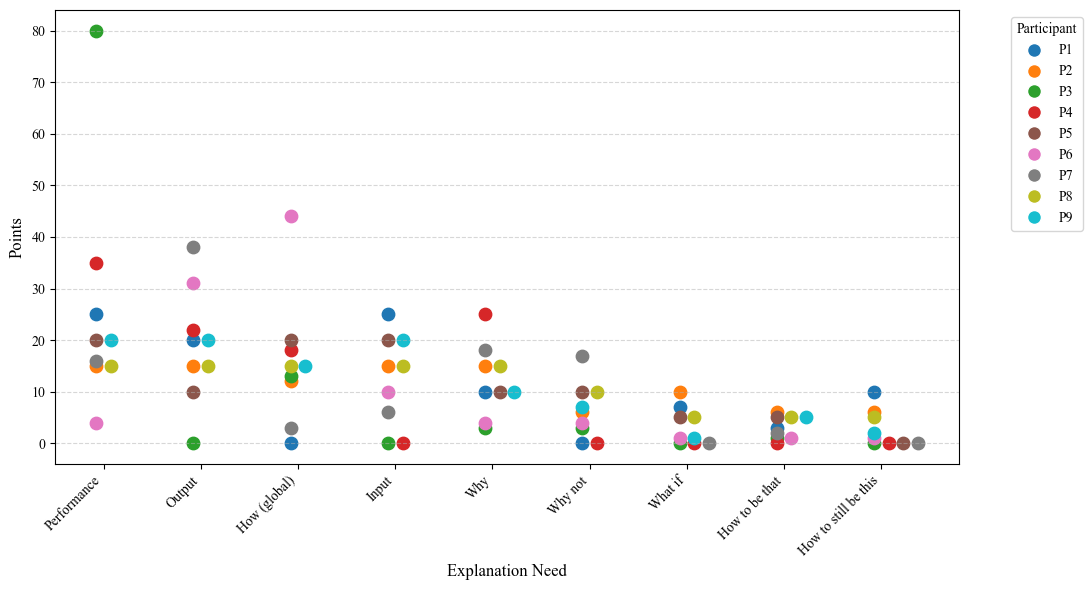

In [74]:
# List of all columns to include
rating_columns = ['Performance', 'Input', 'Output',
                  'How to still be this', 'Why', 'What if',
                  'How to be that', 'Why not', 'How (global)']

# Sort columns by average rating (descending or ascending as preferred)
sorted_columns = ep_df[rating_columns].mean().sort_values(ascending=False).index.tolist()

participants = ep_df['Participant'].values
colors = plt.cm.get_cmap('tab10', len(participants))  # Adjust colormap if more than 10 participants

plt.figure(figsize=(11, 6))

# Plot each rating type with jittered participant scores
for i, column in enumerate(sorted_columns):
    rating_counts = {}  # Tracks count of each rating value to apply horizontal jitter
    for idx, row in ep_df.iterrows():
        rating = row[column]
        participant = row['Participant']
        count = rating_counts.get(rating, 0)
        offset = (count - 0.5) * 0.15
        plt.scatter(i + offset, rating, color=colors(idx), label=f'P{participant}' if i == 0 else "", s=80)
        rating_counts[rating] = count + 1

# Formatting
plt.xticks(range(len(sorted_columns)), sorted_columns, rotation=45, ha='right')
plt.ylabel("Points", fontsize=12)
plt.xlabel("Explanation Need", fontsize=12)

# Custom legend
handles = [plt.Line2D([0], [0], marker='o', color='w', label=f'P{p}',
                      markerfacecolor=colors(i), markersize=10)
           for i, p in enumerate(participants)]
plt.legend(handles=handles, title="Participant", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

In [75]:
ep_df

,Performance,Input,Output,How to still be this,Why,What if,How to be that,Why not,How (global),Participant
0,25.0,25.0,20.0,10.0,10.0,7.0,3.0,0.0,0.0,1
1,15.0,15.0,15.0,6.0,15.0,10.0,6.0,6.0,12.0,2
2,80.0,0.0,0.0,0.0,3.0,0.0,1.0,3.0,13.0,3
3,35.0,0.0,22.0,0.0,25.0,0.0,0.0,0.0,18.0,4
4,20.0,20.0,10.0,0.0,10.0,5.0,5.0,10.0,20.0,5
5,4.0,10.0,31.0,1.0,4.0,1.0,1.0,4.0,44.0,6
6,16.0,6.0,38.0,0.0,18.0,0.0,2.0,17.0,3.0,7
7,15.0,15.0,15.0,5.0,15.0,5.0,5.0,10.0,15.0,8
8,20.0,20.0,20.0,2.0,10.0,1.0,5.0,7.0,15.0,9


In [78]:
import numpy as np
import pandas as pd

# Create summary dictionary
summary = {
    explanation: {
        'Total': np.nansum(points),
        'Mean': np.nanmean(points),
        'Median': np.nanmedian(points),
        'Standard Deviation': np.nanstd(points, ddof=1)  # sample SD
    }
    for explanation, points in explanation_points.items()
}

# Convert to DataFrame
summary_df = pd.DataFrame.from_dict(summary, orient='index')

# Sort by Total descending
summary_df = summary_df.sort_values(by='Total', ascending=False)

# Calculate percentage and cumulative percentage
total_sum = summary_df['Total'].sum()
summary_df['Percentage'] = (summary_df['Total'] / total_sum) * 100
summary_df['Cumulative %'] = summary_df['Percentage'].cumsum()

# Append total row
total_row = pd.DataFrame({
    'Total': [summary_df['Total'].sum()],
    'Mean': [np.nan],  # not applicable
    'Median': [np.nan],  # not applicable
    'Standard Deviation': [np.nan],  # not applicable
    'Percentage': [100.0],
    'Cumulative %': [np.nan]  # not applicable
}, index=['Total'])

summary_df = pd.concat([summary_df, total_row])

summary_df


,Total,Mean,Median,Standard Deviation,Percentage,Cumulative %
Performance,230.0,25.555556,20.0,22.063041,25.555556,25.555556
Output,171.0,19.000000,20.0,11.124298,19.000000,44.555556
How (global),140.0,15.555556,15.0,12.521093,15.555556,60.111111
Input,111.0,12.333333,15.0,8.958236,12.333333,72.444444
Why,110.0,12.222222,10.0,6.887993,12.222222,84.666667
Why not,57.0,6.333333,6.0,5.454356,6.333333,91.000000
What if,29.0,3.222222,1.0,3.666667,3.222222,94.222222
How to be that,28.0,3.111111,3.0,2.204793,3.111111,97.333333
How to still be this,24.0,2.666667,1.0,3.570714,2.666667,100.000000
Total,900.0,NaN,NaN,NaN,100.000000,NaN


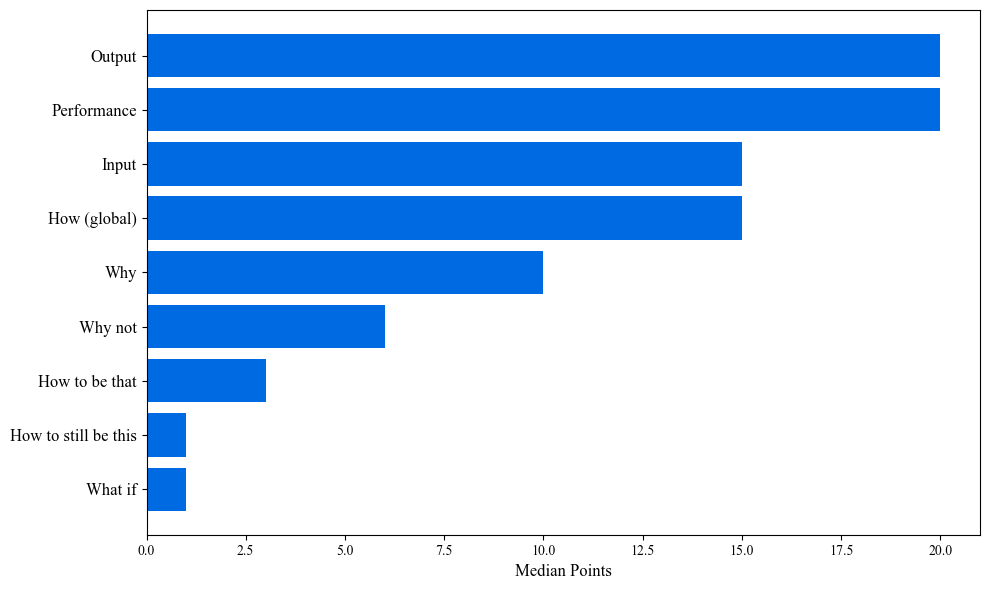

In [22]:
# Sort the DataFrame by total points for a better visual
sorted_df = summary_df.sort_values(by='Median', ascending=True)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_df.index, sorted_df['Median'], color=custom_color)
plt.xlabel('Median Points', fontsize=labelsize, fontname=font)
plt.yticks(fontsize=labelsize, fontname=font)
plt.tight_layout()
plt.show()